In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr
import numpy as np

Pvals= [2, 5, 10, 15, 35]
Gvals = [0, 1, 3, 6, 10, 20, 25, 30, 35]

#Cdim = xr.DataArray([Pvals,Gvals], dims=("P", "G"))
#Cdim

In [4]:
flist = []
Cdims = []
idx = 0

for P in Pvals:
    Glist = []
    for G in Gvals:
        Glist.append(f"data/model_runs/scenario_kp10/scenario/p{P}-g{G}/biomass_data.nc")
    flist.append(Glist)
        #Cdims.append([idx, P, G])
        #idx +=1

len(flist), len(Glist)

Pdim = xr.DataArray(Pvals, dims="P")
Gdim = xr.DataArray(Gvals, dims="G")

Gdim

bgstack = xr.open_mfdataset(flist , combine="nested", concat_dim=[Pdim, Gdim]).biofilm_biomass
bgstack.coords["time"] = bgstack.time / 1440

bgstack

<xarray.DataArray 'biofilm_biomass' (G: 9, P: 5, time: 2689, Y: 50, X: 50)>
dask.array<concatenate, shape=(9, 5, 2689, 50, 50), dtype=float64, chunksize=(1, 1, 2689, 50, 50), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 0.0 0.02083 0.04167 0.0625 ... 55.96 55.98 56.0
  * P        (P) int64 2 5 10 15 35
  * G        (G) int64 0 1 3 6 10 20 25 30 35
Dimensions without coordinates: Y, X

In [5]:
def autocorrelate(data):        
        ndata = data - np.mean(data)
        acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:]
        return acorr / np.var(data) / len(ndata)
    
def autocorrelate_mdim(mdata):
    odata = np.zeros_like(mdata)
    for idx in np.ndindex(mdata.shape[1:]):
        sdata = mdata[idx]
        acorr = autocorrelate(sdata)
        odata[idx] = acorr
    return odata

In [6]:
bgstack = bgstack.transpose("P", "G", "X", "Y", "time").load()
bgstack.data.shape

(5, 9, 50, 50, 2689)

In [5]:
from tqdm.notebook import tqdm
odata = np.zeros_like(bgstack.data)

for idx in tqdm(np.ndindex(bgstack.shape[:-1]), total=np.prod(bgstack.shape[:-1])):
    odata[idx] = autocorrelate(bgstack.data[idx])

  0%|          | 0/112500 [00:00<?, ?it/s]

In [8]:
acorr_stack = bgstack.copy(data=odata)
#acorr_stack

In [13]:
bmetric1 = (bgstack.sel(time=28) - bgstack.sel(time=14)) / bgstack.sel(time=14)
bmetric1.name = "deltaB14_28"

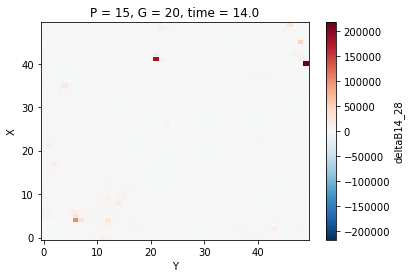

In [14]:
plt.figure()
X=bmetric1.sel(P=15, G=20)
vmin, vmax = X.quantile([0.01, 0.99]).data

X.plot()#vmin=vmin, vmax=vmax)

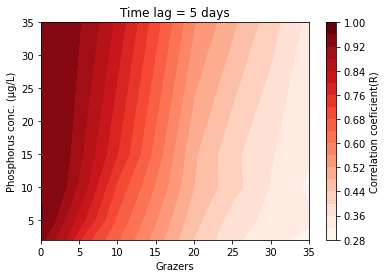

In [15]:
#predictibility p vs g
plt.figure()
plot = acorr_stack.sel(time=1).mean(["X", "Y"]).plot.contourf(levels=20, cmap="Reds")
plt.title(f'Time lag = 5 days')
plt.xlabel('Grazers')
plt.ylabel('Phosphorus conc. (µg/L)')
plot.colorbar.set_label('Correlation coeficient(R)')
#plt.savefig("data/model_runs/scenario_kp10/stacked_figures/lag5_coeff.jpg")

#plt.clf()


In [1]:
#maximum biomass
plt.figure()
plot=bgstack.min("time").mean(["X", "Y"]).plot.contourf(levels=15, cmap="Greens")
plt.xlabel('Grazers')
plt.ylabel('Phosphorus conc. (µg/L)')
plot.colorbar.set_label('Biofilm biomass (mg/cm2)')
#plt.savefig("data/model_runs/scenario_kp10/stacked_figures/max_biomass_p_g.jpg")
plt.show()

NameError: name 'plt' is not defined

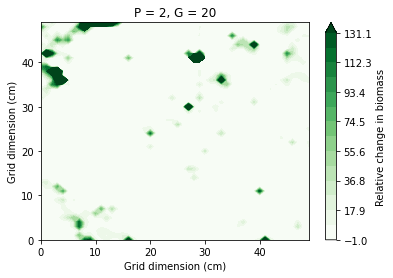

In [95]:
#early growth period
plt.figure()
bmetric_early = (bgstack.sel(time=14) - bgstack.sel(time=7)) / bgstack.sel(time=7)
bmetric_early.name = "Relative change in biomass"


X=bmetric_early.sel(P=2, G=20)
vmin, vmax = X.quantile([0.01, 0.99]).data
X.plot.contourf(levels=15, cmap="Greens", vmin=vmin, vmax=vmax)
plt.xlabel('Grid dimension (cm)')
plt.ylabel('Grid dimension (cm)')
plt.title('P = 2, G = 20')
plt.savefig("data/model_runs/scenario_kp10/stacked_figures/change_rate/early_p2-g20.jpg")
plt.show()
#plt.clf()

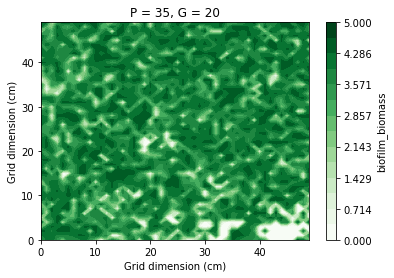

99.59844771298962
3963.955865423233


In [31]:
a = bgstack.sel(time=14)
X=a.sel(P=35, G=1)
#vmin, vmax = X.quantile([0.01, 0.99]).data
X.plot.contourf(levels=15, cmap="Greens", vmin=0, vmax=5)
plt.xlabel('Grid dimension (cm)')
plt.ylabel('Grid dimension (cm)')
plt.title('P = 35, G = 20')
#plt.savefig("data/model_runs/scenario_kp10/stacked_figures/change_rate/early_p35-g20.jpg")
plt.show()
#plt.clf()
print(vmin)
print(vmax)

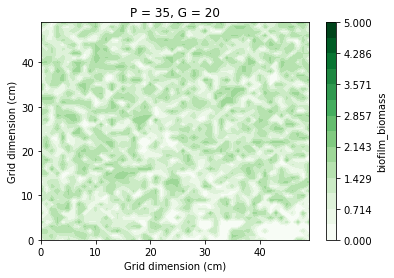

99.59844771298962
3963.955865423233


In [32]:
a = bgstack.sel(time=7)
X=a.sel(P=35, G=1)
#vmin, vmax = X.quantile([0.01, 0.99]).data
X.plot.contourf(levels=15, cmap="Greens", vmin=0, vmax=5)
plt.xlabel('Grid dimension (cm)')
plt.ylabel('Grid dimension (cm)')
plt.title('P = 35, G = 20')
#plt.savefig("data/model_runs/scenario_kp10/stacked_figures/change_rate/early_p35-g20.jpg")
plt.show()
#plt.clf()
print(vmin)
print(vmax)

In [38]:
C= bgstack.sel(time =7, P=35, G=1, X=1, Y=43)
C
D= bgstack.sel(time =14, P=35, G=1, X=1, Y=43)
print(C)
print(D)

<xarray.DataArray 'biofilm_biomass' ()>
array(1.65439668e-08)
Coordinates:
    time     float64 7.0
    P        int64 35
    G        int64 1
<xarray.DataArray 'biofilm_biomass' ()>
array(1.41298609e-06)
Coordinates:
    time     float64 14.0
    P        int64 35
    G        int64 1


In [39]:
((1.41298609e-06  - 1.65439668e-08)/1.65439668e-08) *100

8440.793795596835

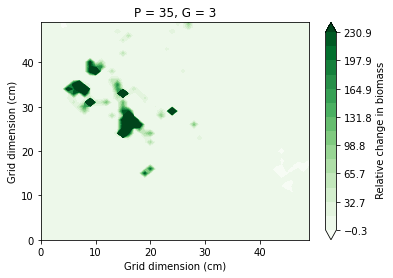

In [83]:
#rate of change
plt.figure()
bmetric_end = (bgstack.sel(time=56) - bgstack.sel(time=35)) / bgstack.sel(time=35)
bmetric_end.name = " Relative change in biomass"


X=bmetric_end.sel(P=35, G=3)
vmin, vmax = X.quantile([0.01, 0.99]).data
X.plot.contourf(levels=15, cmap="Greens", vmin=vmin, vmax=vmax)

plt.xlabel('Grid dimension (cm)')
plt.ylabel('Grid dimension (cm)')
plt.title('P = 35, G = 3')
plt.savefig("data/model_runs/scenario_kp10/stacked_figures/change_rate/final_p35-g3.jpg")
plt.show()
#plt.clf()


In [9]:
#slice day 7 to 56
bgstack.data.shape
bgstack_slice = bgstack.sel(time=slice(7, 56))
bgstack_slice.coords["time"] = bgstack_slice.time - 6
bgstack_slice

<xarray.DataArray 'biofilm_biomass' (P: 5, G: 9, X: 50, Y: 50, time: 2353)>
array([[[[[2.75321040e-01, 2.75372628e-01, 2.75579058e-01, ...,
           3.65390482e+00, 3.65400301e+00, 3.65410120e+00],
          [1.03076542e-01, 1.03100426e-01, 1.03184402e-01, ...,
           2.53065258e+00, 2.53074507e+00, 2.53083757e+00],
          [5.18710155e-02, 5.18830367e-02, 5.19256143e-02, ...,
           1.67922877e+00, 1.67929346e+00, 1.67935816e+00],
          ...,
          [3.71418136e-01, 3.71481306e-01, 3.71749103e-01, ...,
           3.92186104e+00, 3.92194573e+00, 3.92203042e+00],
          [2.85348816e-01, 2.85400705e-01, 2.85612734e-01, ...,
           3.67955536e+00, 3.67964880e+00, 3.67974224e+00],
          [1.35544838e-01, 1.35575825e-01, 1.35685306e-01, ...,
           2.88959841e+00, 2.88970882e+00, 2.88981922e+00]],

         [[3.82329377e-01, 3.82399729e-01, 3.82680231e-01, ...,
           3.99248478e+00, 3.99260060e+00, 3.99271643e+00],
          [3.41856125e-01, 3.41918089e-01, 3.42169602e-01, ...,
           3.87213689e+00, 3.87224040e+00, 3.87234391e+00],
          [2.18609807e-01, 2.18651472e-01, 2.18817563e-01, ...,
           3.38556161e+00, 3.38563889e+00, 3.38571618e+00],
...
          [2.18155699e-09, 2.21254217e-09, 2.25004035e-09, ...,
           2.45702224e-20, 2.48912481e-20, 2.52157143e-20],
          [1.78076453e-10, 1.79065986e-10, 1.80557252e-10, ...,
           2.11450981e-17, 2.13916811e-17, 2.16396949e-17],
          [1.98463217e-12, 1.99759447e-12, 2.01618828e-12, ...,
           1.63790564e-14, 1.64744162e-14, 1.65697763e-14]],

         [[1.05703348e+00, 1.05770659e+00, 1.06069704e+00, ...,
           4.87661958e+00, 4.87669543e+00, 4.87677129e+00],
          [7.04952988e-01, 7.05445380e-01, 7.07621842e-01, ...,
           4.91603796e+00, 4.91608755e+00, 4.91613714e+00],
          [4.98528055e-02, 4.99033620e-02, 5.00913316e-02, ...,
           4.33444497e-03, 4.38361311e-03, 4.43278176e-03],
          ...,
          [1.77132342e-06, 1.78905985e-06, 1.81188490e-06, ...,
           1.43828651e-17, 1.45475379e-17, 1.47132706e-17],
          [1.10791240e-07, 1.10897111e-07, 1.11311628e-07, ...,
           1.64092194e-14, 1.65045791e-14, 1.65999390e-14],
          [9.58166102e-10, 9.60591049e-10, 9.65694151e-10, ...,
           9.53323624e-12, 9.53325230e-12, 9.53326836e-12]]]]])
Coordinates:
  * time     (time) float64 1.0 1.021 1.042 1.062 ... 49.94 49.96 49.98 50.0
  * P        (P) int64 2 5 10 15 35
  * G        (G) int64 0 1 3 6 10 20 25 30 35
Dimensions without coordinates: X, Y

In [108]:
from tqdm.notebook import tqdm
odata2 = np.zeros_like(bgstack_slice.data)

for idx in tqdm(np.ndindex(bgstack_slice.shape[:-1]), total=np.prod(bgstack_slice.shape[:-1])):
    odata2[idx] = autocorrelate(bgstack_slice.data[idx])
acorr_stack2 = bgstack_slice.copy(data=odata2)


  0%|          | 0/112500 [00:00<?, ?it/s]

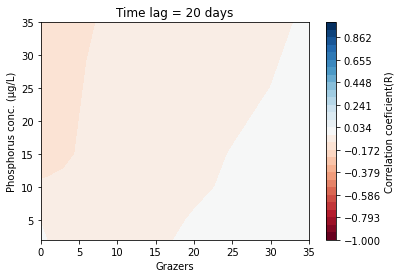

In [58]:
#predictibility p vs g with sliced data
plt.figure()
plot = acorr_stack.sel(time=20).mean(["X", "Y"]).plot.contourf(levels=30, cmap="RdBu", vmin=-1, vmax=1)
plt.title(f'Time lag = 20 days')
plt.xlabel('Grazers')
plt.ylabel('Phosphorus conc. (µg/L)')
plot.colorbar.set_label('Correlation coeficient(R)')
plt.savefig("data/model_runs/scenario_kp10/stacked_figures/lag20_coeff.jpg")

#plt.clf()


In [125]:
acorr_stack

<xarray.DataArray 'biofilm_biomass' (P: 5, G: 9, X: 50, Y: 50, time: 2689)>
array([[[[[ 1.00000000e+00,  9.98979612e-01,  9.97956305e-01, ...,
           -2.67386856e-03, -1.78268374e-03, -8.91372577e-04],
          [ 1.00000000e+00,  9.98721618e-01,  9.97439099e-01, ...,
           -2.72510141e-03, -1.81682912e-03, -9.08447408e-04],
          [ 1.00000000e+00,  9.98529163e-01,  9.97053077e-01, ...,
           -2.76952877e-03, -1.84644175e-03, -9.23252860e-04],
          ...,
          [ 1.00000000e+00,  9.99037415e-01,  9.98072134e-01, ...,
           -2.66615408e-03, -1.77754429e-03, -8.88800855e-04],
          [ 1.00000000e+00,  9.98985812e-01,  9.97968722e-01, ...,
           -2.67498652e-03, -1.78342804e-03, -8.91743713e-04],
          [ 1.00000000e+00,  9.98801521e-01,  9.97599337e-01, ...,
           -2.70488153e-03, -1.80335616e-03, -9.01713220e-04]],

         [[ 1.00000000e+00,  9.99047574e-01,  9.98092536e-01, ...,
           -2.65474293e-03, -1.76995001e-03, -8.85010498e-04],
          [ 1.00000000e+00,  9.99024995e-01,  9.98047269e-01, ...,
           -2.66334782e-03, -1.77567794e-03, -8.87871326e-04],
          [ 1.00000000e+00,  9.98923958e-01,  9.97844721e-01, ...,
           -2.68843095e-03, -1.79237910e-03, -8.96215775e-04],
...
          [ 1.00000000e+00,  9.34975483e-01,  8.70879938e-01, ...,
           -1.03672965e-03, -6.90232997e-04, -3.44975210e-04],
          [ 1.00000000e+00,  9.30833191e-01,  8.62658246e-01, ...,
           -1.04473756e-03, -6.95550295e-04, -3.47625826e-04],
          [ 1.00000000e+00,  9.41900110e-01,  8.84624867e-01, ...,
           -1.02179672e-03, -6.80293918e-04, -3.40006960e-04]],

         [[ 1.00000000e+00,  9.98591879e-01,  9.97117506e-01, ...,
           -2.13382290e-03, -1.42267243e-03, -7.11370854e-04],
          [ 1.00000000e+00,  9.98913448e-01,  9.97773186e-01, ...,
           -2.20171664e-03, -1.46791638e-03, -7.33982606e-04],
          [ 1.00000000e+00,  9.97806987e-01,  9.94113187e-01, ...,
           -3.03678822e-04, -2.01878848e-04, -1.00834549e-04],
          ...,
          [ 1.00000000e+00,  9.49744842e-01,  9.00171314e-01, ...,
           -1.06615349e-03, -7.09516586e-04, -3.54464470e-04],
          [ 1.00000000e+00,  9.56447350e-01,  9.13567635e-01, ...,
           -1.79565231e-03, -1.19553909e-03, -5.97533560e-04],
          [ 1.00000000e+00,  9.30849506e-01,  8.62681449e-01, ...,
           -1.04665939e-03, -6.96838015e-04, -3.48272189e-04]]]]])
Coordinates:
  * time     (time) float64 0.0 0.02083 0.04167 0.0625 ... 55.96 55.98 56.0
  * P        (P) int64 2 5 10 15 35
  * G        (G) int64 0 1 3 6 10 20 25 30 35
Dimensions without coordinates: X, Y

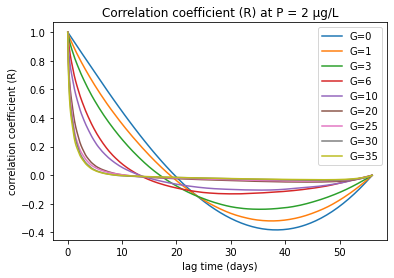

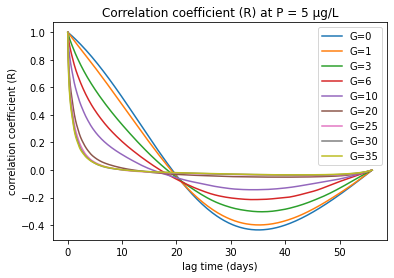

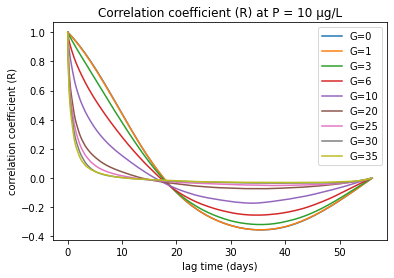

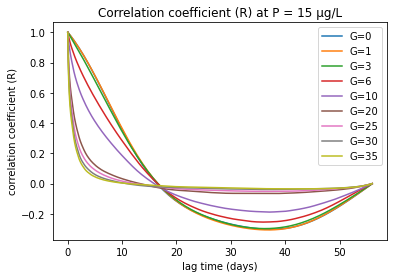

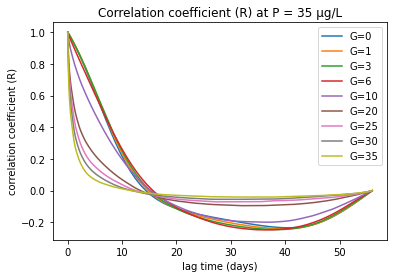

<Figure size 432x288 with 0 Axes>

In [11]:

LAGS = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13, 14, 15,16, 17, 18, 19,20, 21, 22,23,24,25,26,27,28,29,30,31,32,33,34,35, 40, 45, 50])
nutrient =[2,5,10,15,35]
for i in nutrient:
    plot1 = acorr_stack.sel(P=i, G=0).mean(["X", "Y"])
    plot2 = acorr_stack.sel(P=i, G=1).mean(["X", "Y"])
    plot3 = acorr_stack.sel(P=i, G=3).mean(["X", "Y"])
    plot4 = acorr_stack.sel(P=i, G=6).mean(["X", "Y"])
    plot5 = acorr_stack.sel(P=i, G=10).mean(["X", "Y"])
    plot6 = acorr_stack.sel(P=i, G=20).mean(["X", "Y"])
    plot7 = acorr_stack.sel(P=i, G=25).mean(["X", "Y"])
    plot8 = acorr_stack.sel(P=i, G=30).mean(["X", "Y"])
    plot9 = acorr_stack.sel(P=i, G=35).mean(["X", "Y"])
    
    time = acorr_stack.time
    import matplotlib.pyplot as plt

    plt.plot(time, plot1, label="G=0")
    plt.plot(time, plot2, label="G=1")
    plt.plot(time, plot3, label="G=3")
    plt.plot(time, plot4, label="G=6")
    plt.plot(time, plot5, label="G=10")
    plt.plot(time, plot6, label="G=20")
    plt.plot(time, plot7, label="G=25")
    plt.plot(time, plot8, label="G=30")
    plt.plot(time, plot9, label="G=35")
  

    plt.ylabel("correlation coefficient (R)")
    plt.title(f"Correlation coefficient (R) at P = {i} μg/L")
    plt.xlabel("lag time (days)")
    plt.legend()
    plt.savefig(f"data/model_runs/scenario_kp10/scenario/mean_corr_timeline_nutrient/new/p{i}_coeff.jpg")
    plt.show()
    plt.clf()

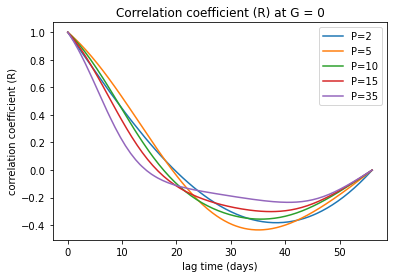

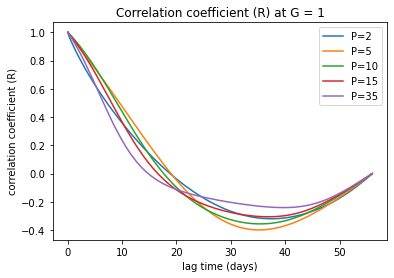

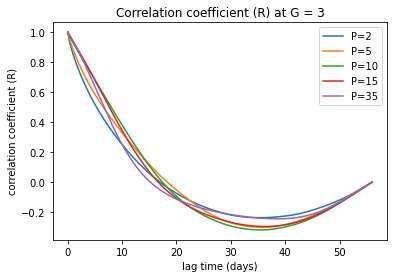

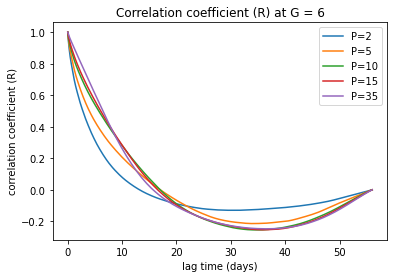

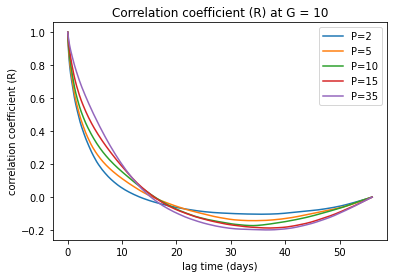

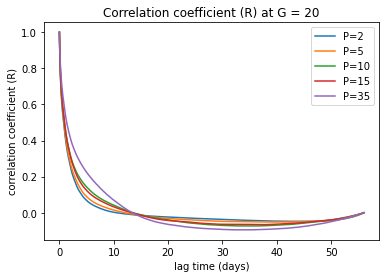

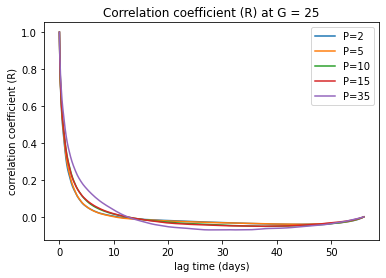

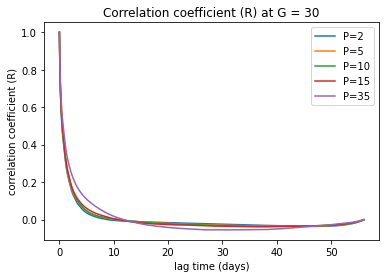

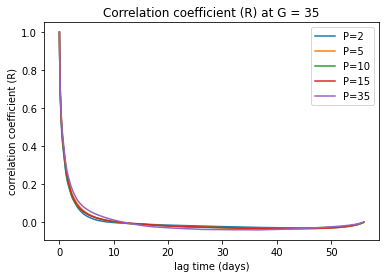

<Figure size 432x288 with 0 Axes>

In [12]:
grazer = [0,1,3,6,10,20,25,30,35]
for i in grazer:
    plot1 = acorr_stack.sel(P=2, G=i).mean(["X", "Y"])
    plot2 = acorr_stack.sel(P=5, G=i).mean(["X", "Y"])
    plot3 = acorr_stack.sel(P=10, G=i).mean(["X", "Y"])
    plot4 = acorr_stack.sel(P=15, G=i).mean(["X", "Y"])
    plot5 = acorr_stack.sel(P=35, G=i).mean(["X", "Y"])

    
    time = acorr_stack.time
    import matplotlib.pyplot as plt

    plt.plot(time, plot1, label="P=2")
    plt.plot(time, plot2, label="P=5")
    plt.plot(time, plot3, label="P=10")
    plt.plot(time, plot4, label="P=15")
    plt.plot(time, plot5, label="P=35")
   
  

    plt.ylabel("correlation coefficient (R)")
    plt.title(f"Correlation coefficient (R) at G = {i}")
    plt.xlabel("lag time (days)")
    plt.legend()
    plt.savefig(f"data/model_runs/scenario_kp10/scenario/mean_corr_timeline_grazer/new/g{i}_coeff.jpg")
    plt.show()
    plt.clf()

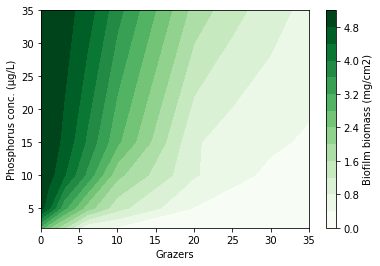

In [12]:
#mean biomass
plt.figure()
plot=bgstack.max("time").mean(["X", "Y"]).plot.contourf(levels=15, cmap="Greens")
plt.xlabel('Grazers')
plt.ylabel('Phosphorus conc. (µg/L)')
plot.colorbar.set_label('Biofilm biomass (mg/cm2)')
#plt.savefig("data/model_runs/scenario_kp10/stacked_figures/max_biomass_p_g.jpg")
plt.show()


In [7]:
#predictibility p vs g with sliced data
plt.figure()
plot = bgstack.isel(P=2, G = 8).mean(["X", "Y"]).plot.contourf(levels=20, cmap="Reds")
plt.title(f'Time lag = 5 days')
plt.xlabel('Grazers')
plt.ylabel('Phosphorus conc. (µg/L)')
plot.colorbar.set_label('Correlation coeficient(R)')
#plt.savefig("data/model_runs/scenario_kp10/stacked_figures/lag5_coeff.jpg")

#plt.clf()

ValueError: DataArray must be 2d

<Figure size 432x288 with 0 Axes>